### Student Information
Name:林禹安

Student ID: 

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [32]:
### Begin Assignment Here
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt   
import nltk
nltk.download('punkt') # download the NLTK datasets
import plotly as py 
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
import re 



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\禹安\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
# 因為觀察到 text 與 title 欄位中有許多換行符號與多餘空白，會影響後續的文字處理
# 因此在這邊新建一個函式專門清理這些多餘的東西
# 使用正則表達式
def clean_text(s):
    if isinstance(s, str):
        s = re.sub(r'\r|\n', ' ', s)
        s = re.sub(r'\s+', ' ', s).strip()
        return s
    return s  

df = pd.read_csv(
    'newdataset\Reddit-stock-sentiment.csv',
    converters={'text': clean_text, 'title': clean_text}
)
#列出所有欄位名稱
list(df.columns)

['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

In [34]:
# 用 type 當作 category(對應master那份的)
# 查看 type 欄位有哪些類別、各有幾筆資料
df['type'].value_counts(dropna=False)
#可以發現只有兩種且沒有缺失值

type
comment    783
post        64
Name: count, dtype: int64

In [26]:
#設定categories
categories = ['post', 'comment']

In [35]:
#列出前十筆資料
df[['type','title', 'text']].head(10)


,type,title,text
0,comment,Retardation is on the menu boys! WSB is so back,Calls on retards
1,comment,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...
2,comment,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.
3,post,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...
4,comment,The Trump administration is begging Xi Jinping...,He didn’t say thank you.
5,comment,Weekend Discussion Thread for the Weekend of A...,"Hoping to ejaculate in wet warm puss tonight, ..."
6,comment,Is the market in complete denial right now?,Trump will respond to china increasing their t...
7,comment,Retardation is on the menu boys! WSB is so back,Confirmed not a trap. Its been like this for p...
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Am I the only one seeing the cup & handle brea...
9,comment,Any cheap stocks under $10?,HLGN is $10. Hurry and catch it now before it ...


In [36]:
# 對應 Master 中的 X = pd.DataFrame.from_records的部分
X_text = pd.DataFrame({
    'text': df['text'].fillna(''),
    'category_name': df['type']
})

In [37]:
#找出文字最長的10篇文章，並依照順序列出文章長度與分類名稱
X_text['len'] = X_text['text'].str.len()
X_text[['len', 'category_name']].sort_values(by='len', ascending=False).head(10)

,len,category_name
87,2722,comment
169,2434,post
31,2357,comment
224,2022,comment
351,1766,post
63,1463,post
148,1336,comment
369,1191,post
250,1087,post
3,1061,post


In [38]:
#對應Excercise 3
X_text[X_text['category_name'] == 'post'][::10].head(5)

,text,category_name,len
3,Vision Marine Technologies Inc. is rewriting t...,post,1061
165,Stock list generated from technical Analysis. ...,post,313
332,"Mostly in MSTR calls, AAPL puts and GBTC long.",post,46
421,Stocks that are trending up today [Popping (st...,post,64
487,"Good Morning Investors, I am a young Finance s...",post,642


In [43]:
#找有沒有缺失值
X_text.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category_name,len
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [42]:
# Excercise 4
X_text.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [51]:
# 檢查資料中是否有重複的資料，並列出有幾樣
X_text.duplicated().sum()



np.int64(0)

In [52]:
# 刪除重複的資料
X_text.drop_duplicates(keep=False, inplace=True)
# 再次檢查資料中是否有重複的資料
X_text.duplicated().sum()



np.int64(0)

In [56]:
# 取樣 100項
X_sample= X_text.sample(n=100)
len(X_sample)
X_sample[0:4]

,text,category_name,len
539,China has been preparing for this and this adm...,comment,370
759,u/wutang that’s a badass name,comment,29
119,China to the fucking moon. Fuck that clown.,comment,43
144,"No, they love it. It allows them to live vicar...",comment,363


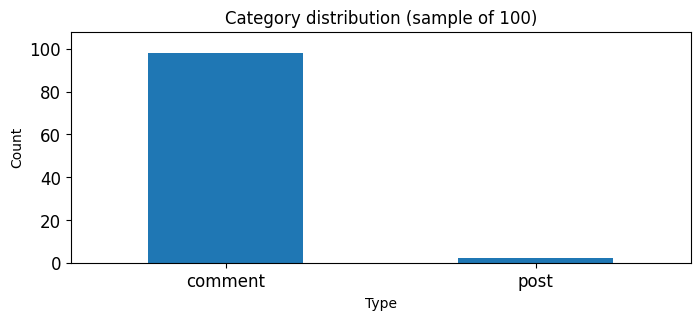

In [66]:
#畫圖
X_sample['category_name'].value_counts().plot(
    kind='bar',
    title='Category distribution (sample of 100)',
    ylim=[0, X_sample['category_name'].value_counts().max() + 10],
    rot=0,
    fontsize=12,
    figsize=(8,3)
)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

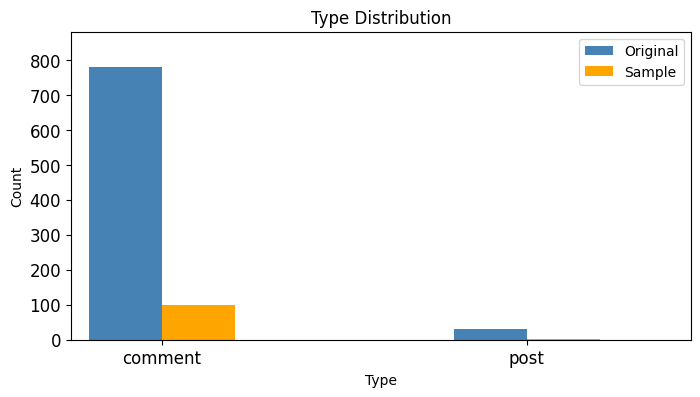

In [65]:
# 原始資料長條圖
X_text['category_name'].value_counts().plot(
    kind='bar',
    width=0.2,
    position=1,
    color='steelblue',
    label='Original',
    ylim=[0, X_text['category_name'].value_counts().max() + 100],
    rot=0, fontsize=12, figsize=(8,4)
)

# 取樣後資料長條圖
X_sample['category_name'].value_counts().plot(
    kind='bar',
    width=0.2,
    position=0,
    color='orange',
    label='Sample',
    ylim=[0, X_text['category_name'].value_counts().max() + 100],
    rot=0, fontsize=12, figsize=(8,4)
)

# 設定標題與圖例
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
# 取得unigrams
X_text['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [68]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_text.text) #learn the vocabulary and return document-term matrix

In [71]:
analyze = count_vect.build_analyzer()
analyze(X_text.text[0])

['calls', 'on', 'retards']

In [75]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
 term_frequencies.append(sum(X_counts[:,j].toarray()))

In [81]:
# 取得詞彙表
vocab = count_vect.get_feature_names_out()

# 計算每個詞在所有文件中的總出現次數
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()


In [83]:
N = 300

df_plot = pd.DataFrame({
    'term': vocab[:N],
    'freq': term_frequencies[:N],
})

fig = px.bar(
    df_plot,
    x='term', y='freq',
    title=f'First {N} terms',
)

fig.update_layout(
    xaxis_tickangle=90,      
    bargap=0.2,              
    width=1200, height=500   
)

fig.show()


In [84]:
df_plot = df_plot.sort_values(by='freq', ascending=False)

fig = px.bar(
    df_plot,
    x='term', y='freq',
    title='First 300 terms (sorted by frequency)'
)
fig.update_layout(
    xaxis_tickangle=90,
    bargap=0.2,
    width=1200, height=500
)
fig.show()

In [85]:
df_plot['log_freq'] = np.log1p(df_plot['freq'])

fig = px.bar(
    df_plot,
    x='term', y='log_freq',
    title='Top terms with log-transformed frequency (log1p)'
)
fig.update_layout(
    xaxis_tickangle=90,
    bargap=0.2,
    width=1200, height=500
)
fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here